# 日本の中古マンション価格予測 2021年

このノートでは、日本の中古マンション価格について分析します。これらのデータセットは、[ニシカジャパン](https://www.nishika.co.jp/)からオンラインコンテストのために提供されたものです
 
## 目的

目的は、日本の中古マンションの価格を予測することです。

### 目次

<b>1.データ分析</b>
* 1.1.基本的な分析
* 1.2.欠損情報
* 1.3.中古マンション分析
* 1.4.価格分析

<b>2.価格予測</b>
* 2.1.機能エンジニアリングとデータの前処理
* 2.2.トレーニングとテスト
* 2.3.結論

## 1.データ分析
### 1.1.基本的な分析

In [42]:
#インポート
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
#データを連結する必要があります
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('train/', "*.csv"))))

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\reshape\concat.py:294: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651975 entries, 0 to 1857
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            651975 non-null  int64  
 1   種類            651975 non-null  object 
 2   地域            0 non-null       float64
 3   市区町村コード       651975 non-null  int64  
 4   都道府県名         651975 non-null  object 
 5   市区町村名         651975 non-null  object 
 6   地区名           651318 non-null  object 
 7   最寄駅：名称        649342 non-null  object 
 8   最寄駅：距離（分）     628916 non-null  object 
 9   間取り           629546 non-null  object 
 10  面積（㎡）         651975 non-null  object 
 11  土地の形状         0 non-null       float64
 12  間口            0 non-null       float64
 13  延床面積（㎡）       0 non-null       float64
 14  建築年           633280 non-null  object 
 15  建物の構造         637098 non-null  object 
 16  用途            601333 non-null  object 
 17  今後の利用目的       288948 non-null  object 
 18  前面道路：方

In [48]:
df.head()

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1117225,中古マンション等,NaN,1213,北海道,苫小牧市,新中野町,苫小牧,25,３ＬＤＫ,...,NaN,NaN,NaN,準工業地域,60.0,200.0,2018年第３四半期,未改装,NaN,7.431364
1,1001180,中古マンション等,NaN,1101,北海道,札幌市中央区,北２条西,西２８丁目,8,４ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2018年第３四半期,未改装,NaN,7.568202
2,1099061,中古マンション等,NaN,1207,北海道,帯広市,西３条南,帯広,2,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,500.0,2016年第２四半期,未改装,NaN,7.204120
3,1039968,中古マンション等,NaN,1105,北海道,札幌市豊平区,平岸２条,南平岸,6,３ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2018年第４四半期,改装済,NaN,7.447158
4,1072923,中古マンション等,NaN,1202,北海道,函館市,梁川町,五稜郭,30分?60分,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2015年第１四半期,未改装,NaN,7.322219


データセットには有用でない情報（例えばID）が含まれて多くの行には欠損情報があります

### 1.2.欠損情報

In [49]:
#欠損情報の数
df.isnull().sum(axis = 0)

ID                   0
種類                   0
地域              651975
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                657
最寄駅：名称            2633
最寄駅：距離（分）        23059
間取り              22429
面積（㎡）                0
土地の形状           651975
間口              651975
延床面積（㎡）         651975
建築年              18695
建物の構造            14877
用途               50642
今後の利用目的         363027
前面道路：方位         651975
前面道路：種類         651975
前面道路：幅員（ｍ）      651975
都市計画             18813
建ぺい率（％）          22807
容積率（％）           22807
取引時点                 0
改装               58674
取引の事情等          633578
取引価格（総額）_log         0
dtype: int64

In [50]:
#欠損情報（単位：パーセント）
round(df.isnull().sum() * 100 / len(df))

ID                0.0
種類                0.0
地域              100.0
市区町村コード           0.0
都道府県名             0.0
市区町村名             0.0
地区名               0.0
最寄駅：名称            0.0
最寄駅：距離（分）         4.0
間取り               3.0
面積（㎡）             0.0
土地の形状           100.0
間口              100.0
延床面積（㎡）         100.0
建築年               3.0
建物の構造             2.0
用途                8.0
今後の利用目的          56.0
前面道路：方位         100.0
前面道路：種類         100.0
前面道路：幅員（ｍ）      100.0
都市計画              3.0
建ぺい率（％）           3.0
容積率（％）            3.0
取引時点              0.0
改装                9.0
取引の事情等           97.0
取引価格（総額）_log      0.0
dtype: float64

<AxesSubplot:>

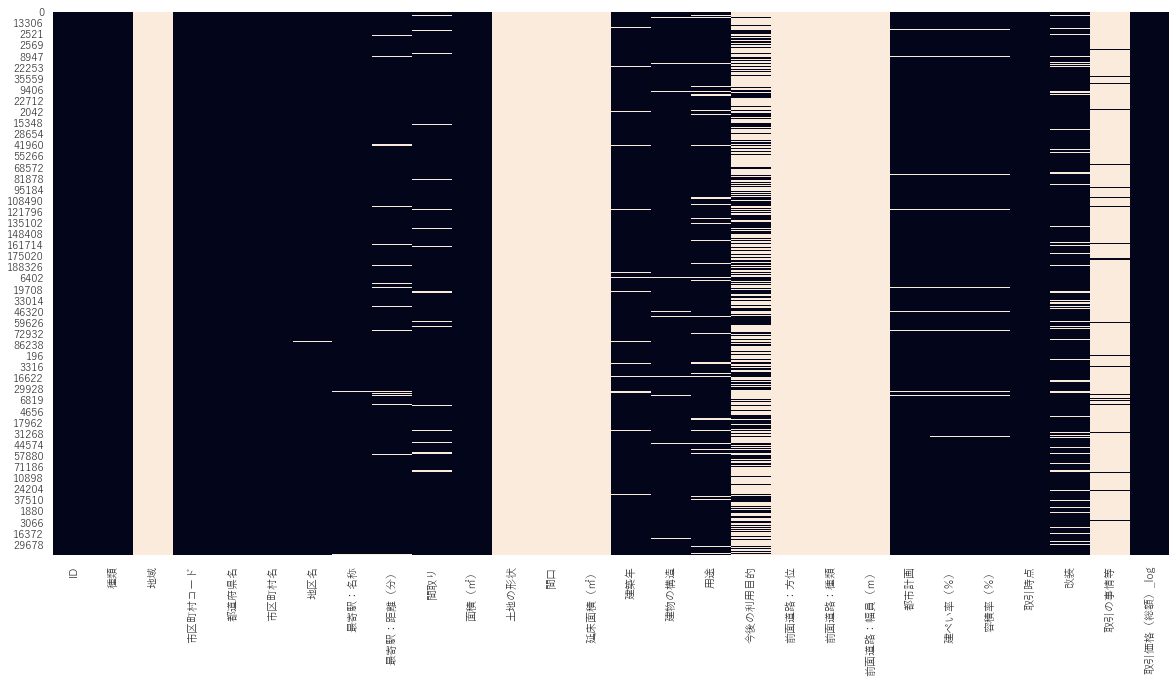

In [51]:
#欠損情報のヒートマップ
sns.set(font='Yu Gothic')
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [52]:
#無駄な変数を削除しましょう
df = df.drop(['ID',
              '種類',
              '地域',
              '土地の形状',
              '間口',
              '延床面積（㎡）',
              '今後の利用目的',
              '前面道路：方位',
              '前面道路：種類',
              '前面道路：幅員（ｍ）',
              '取引の事情等'], axis=1)

In [53]:
#そして欠損情報を取り除きます
df = df.dropna()

<AxesSubplot:>

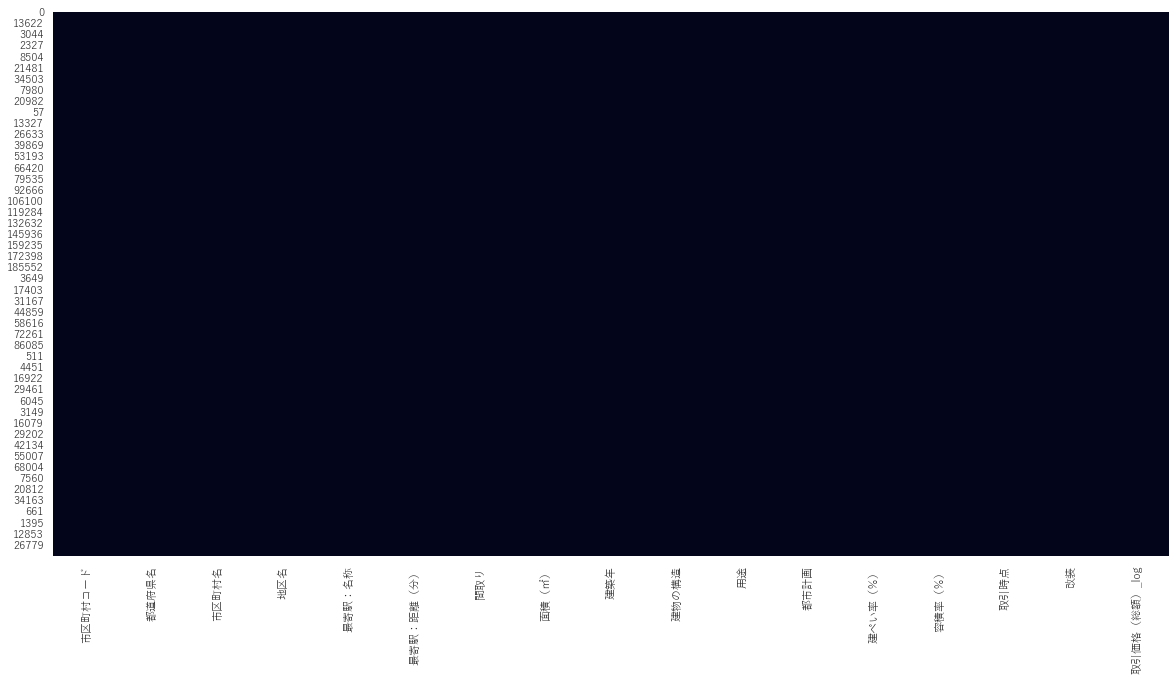

In [54]:
#新しい欠損情報のヒートマップ
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### 1.3.中古マンション分析

日本語の書き込みを行うためには、[日本語フロント](https://github.com/ElieSDK/Property_Price_Forecasting/tree/main/Front)を読み込む必要があります。

In [56]:
front = FontProperties(fname='NotoSansCJKjp-Regular.otf', size=18) 

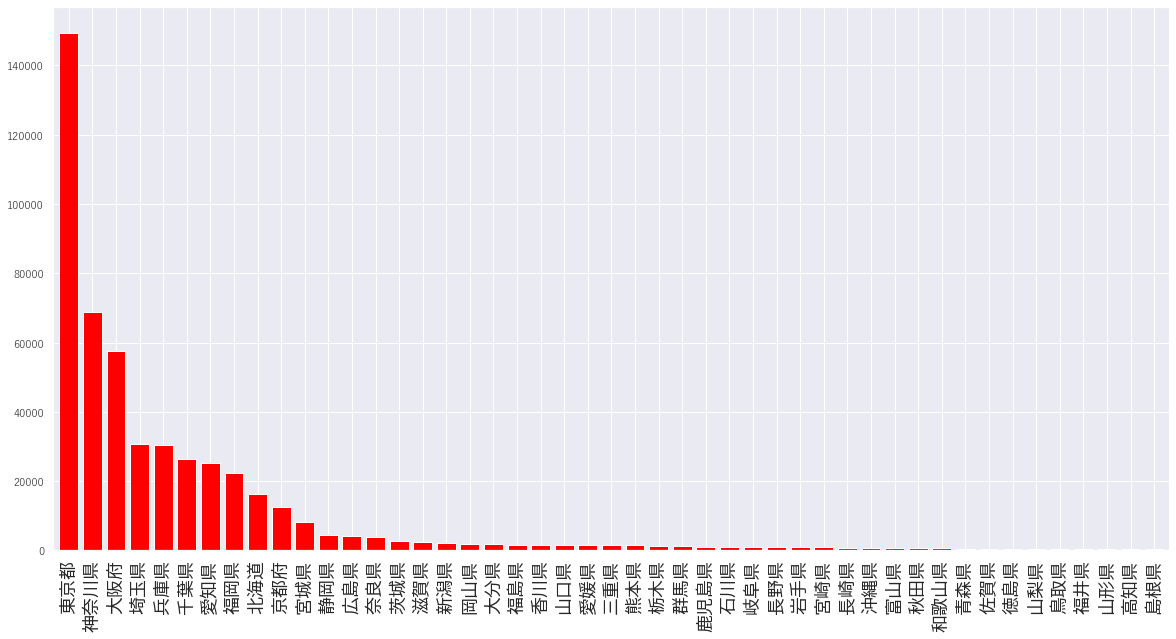

In [57]:
#都道府県名
ax = df['都道府県名'].value_counts().plot(kind="bar", 
                                               legend=False,
                                               color='red',
                                               width=0.8, 
                                               figsize=(20,10))
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

このプロットでは、東京都、神奈川県、大阪府に多くの不動産が所在していることがわかります。

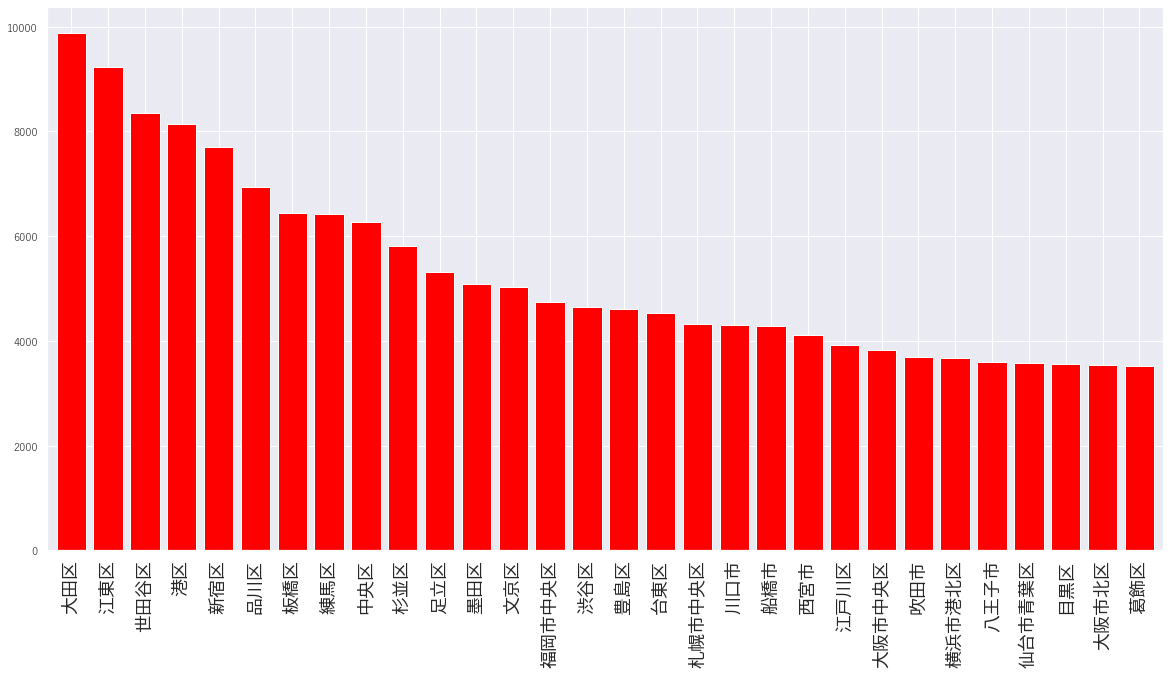

In [58]:
#都市名(上位30位)
ax = df['市区町村名'].value_counts().head(30).plot(kind="bar", 
                                               legend=False,
                                               color='red',
                                               width=0.8, 
                                               figsize=(20,10))
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

大田区、江東区、世田谷区、港区、新宿区が上を占めています。

In [59]:
#平均面積
##”2000㎡以上”は数値ではないので、まず数値を変更する必要があります。 
pd.unique(df['面積（㎡）'])

array([120, 80, 70, 65, 90, 15, 55, 75, 60, 95, 85, 25, 35, 45, 160, 40,
       105, 20, 50, 100, 125, 110, 30, 145, 115, 150, 130, 155, 135, 190,
       10, 260, 220, 165, 140, 360, 185, 250, 170, 200, '70', '15', '45',
       '80', '40', '25', '35', '55', '85', '50', '20', '65', '75', '30',
       '90', '60', '95', '120', '140', '130', '115', '110', '2000㎡以上',
       '100', '125', '105', 470, 180, 450, 300, 970, 390, 175, 740, 330,
       860, 460, 270, 210, 195, 580, 310, 500, 350, 400, 630, 290, 440,
       1500, 380, 240, 370, 480, 340, 230, 410, 690, 430, 1000, 590, 320,
       520, 730, 280, 890, 1300, 560, 720, 770, '10', '135', '160', '170',
       '175', '145', '270', '180', '320', '185', '155', '195', '210',
       '165', '300', '240', '400', '440', '150', '480', '230', '190',
       '290', '220', '280', '450', '1200', '200', '260', 660, 540, 710,
       960, 900, 940, 700, 650, 760, 680, 790, 610, '650', '660', 510,
       1100, 670, 800, '510', '730', '250', '410', '390', 

In [60]:
#まず、すべての情報を文字列に変換します。
df['面積（㎡）'] = df['面積（㎡）'].astype(str)
#そして、'2000㎡以上'を2000で変更します。
df['面積（㎡）'] = df['面積（㎡）'].replace(['2000㎡以上'], '2000')

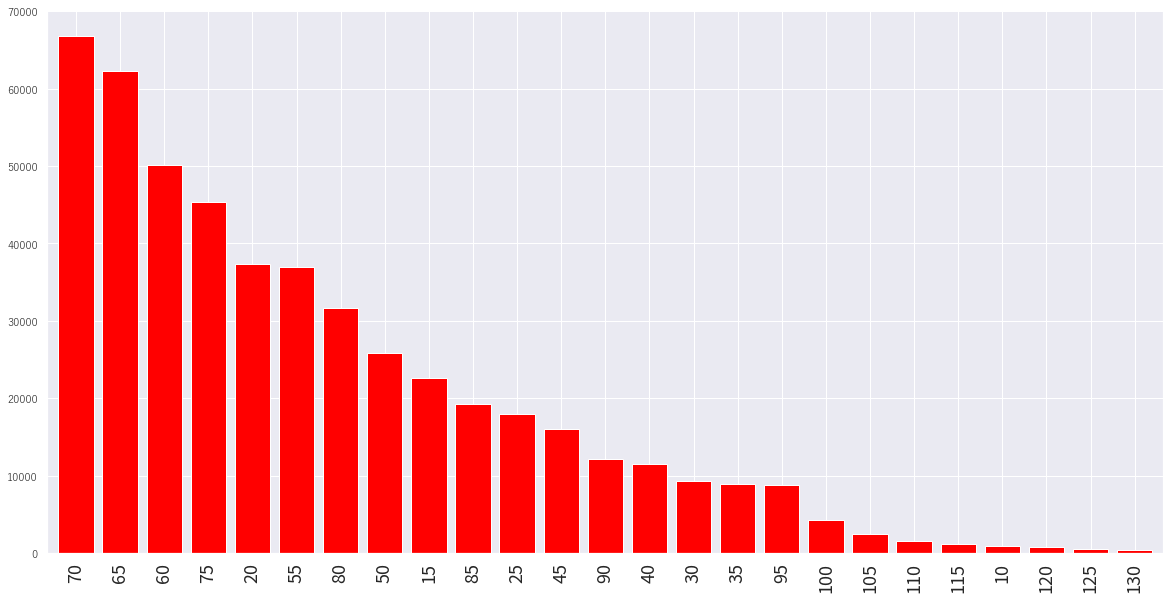

In [61]:
ax = df['面積（㎡）'].value_counts().head(25).plot(kind="bar", 
                                                 legend=False,
                                                 color='red',
                                                 width=0.8, 
                                                 figsize=(20,10),
                                                 stacked=True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

60m2～75m2の不動産が最も多く収録されています。

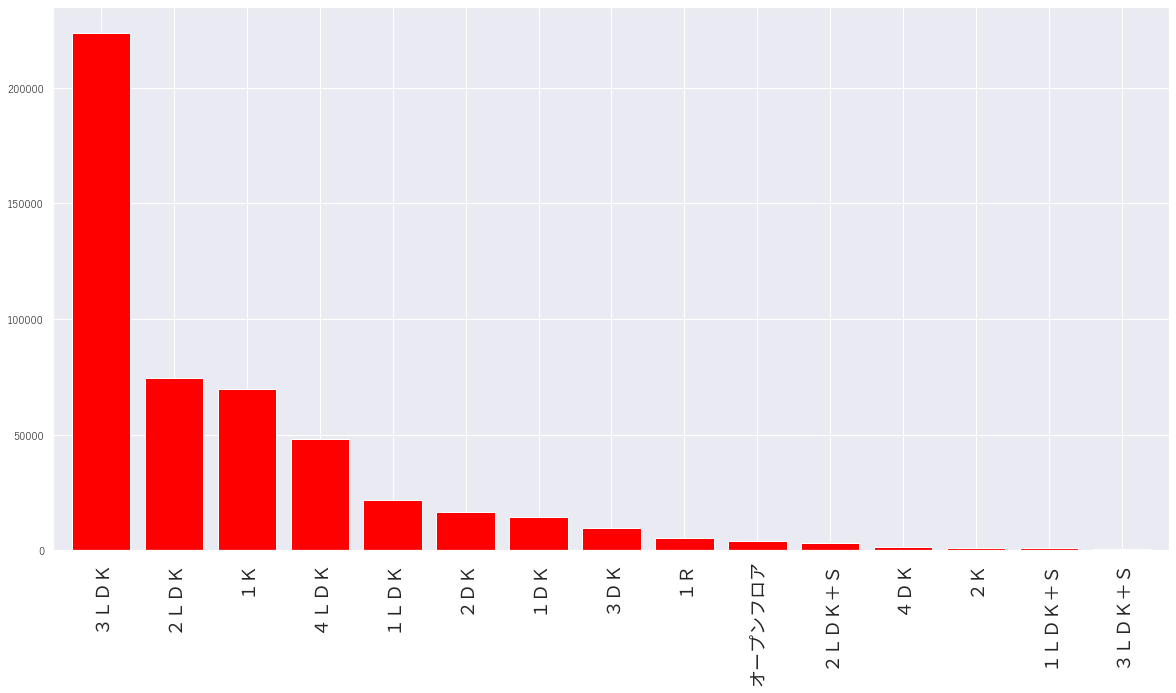

In [62]:
#間取り
ax = df['間取り'].value_counts().head(15).plot(kind="bar", 
                                                 legend=False,
                                                 color='red',
                                                 width=0.8, 
                                                 figsize=(20,10),
                                                 stacked=True)
for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

3LDKが最も多く、次いで2LDK、1Kとなります。

### 1.4.価格分析

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='取引価格（総額）_log', ylabel='Density'>

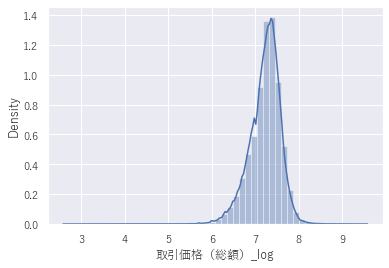

In [63]:
#取引価格の対数分布
sns.distplot(df['取引価格（総額）_log'])

このグラフは、取引価格を対数で表したものです。

In [65]:
#製造年別平均価格
#平均築年数を算出してからプロットしています。
PvsY = df[['建築年','取引価格（総額）_log']].set_index('建築年').stack().reset_index().groupby('建築年').agg('mean')

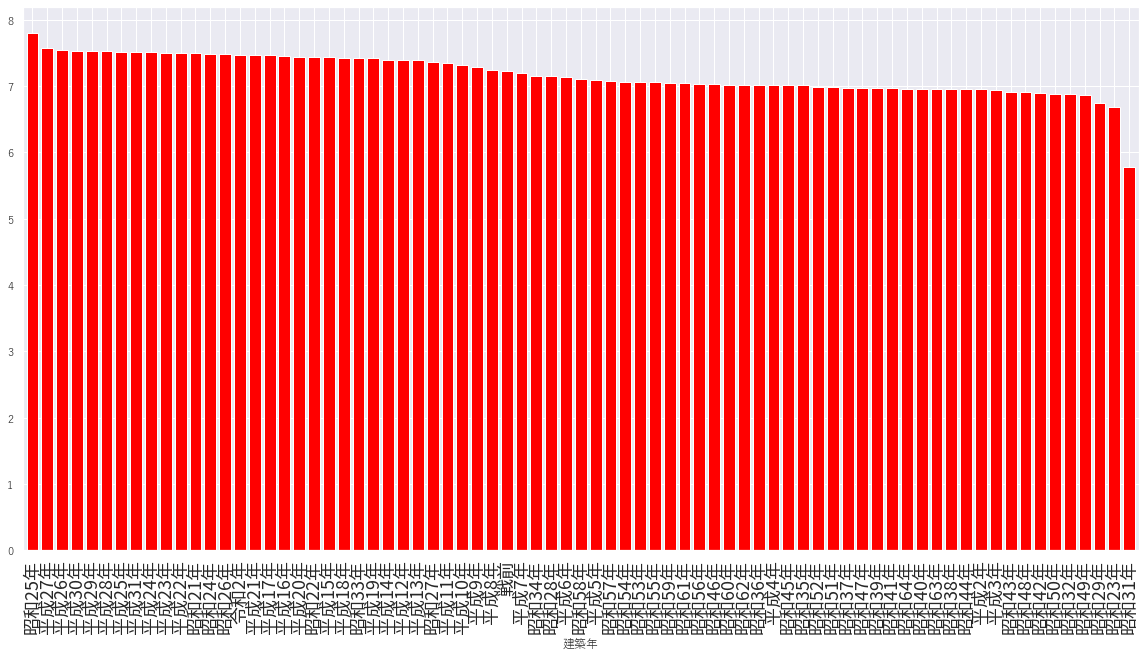

In [66]:
ax = PvsY.sort_values(by=0, ascending=False).plot(kind="bar",
                                                  legend=False,
                                                  color='red',
                                                  width=0.8, 
                                                  figsize=(20,10))

for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

このグラフは、築年数に対する不動産の平均価格を表しています。築年数が古い（30年以上）ほど安くなる。

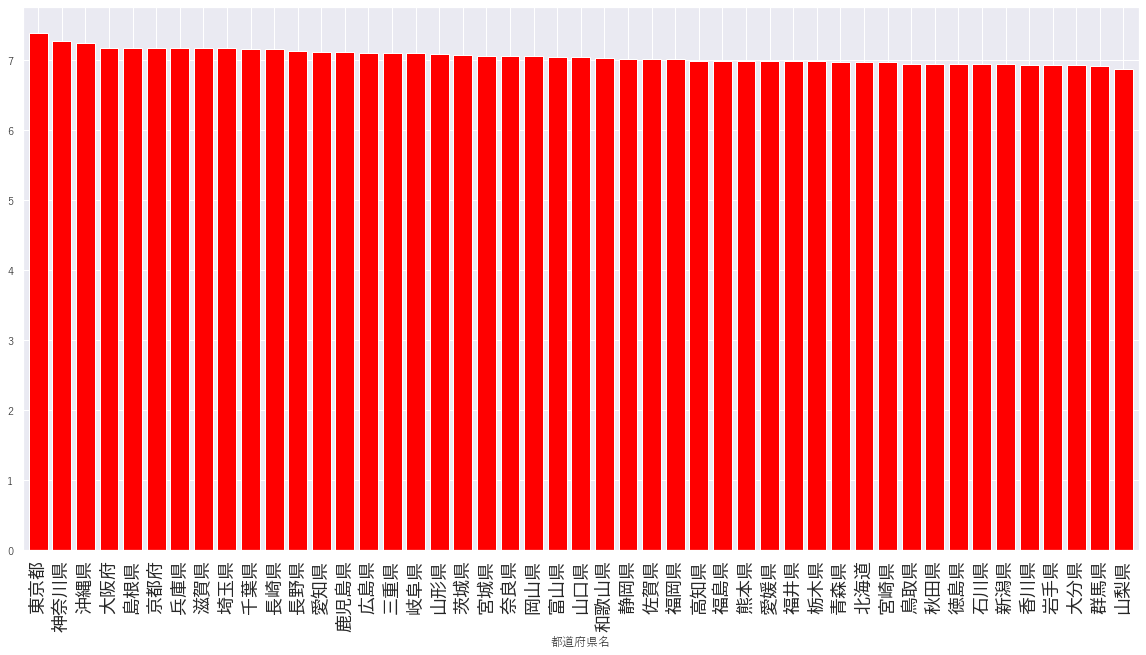

In [67]:
#都道府県別平均価格
PvsPr = df[['都道府県名','取引価格（総額）_log']].set_index('都道府県名').stack().reset_index().groupby('都道府県名').agg('mean')

ax = PvsPr.sort_values(by=0, ascending=False).plot(kind="bar",
                                                   legend=False,
                                                   color='red',
                                                   width=0.8, 
                                                   figsize=(20,10))

for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

東京都が最も高いが、他の都道府県との差は大きくない。

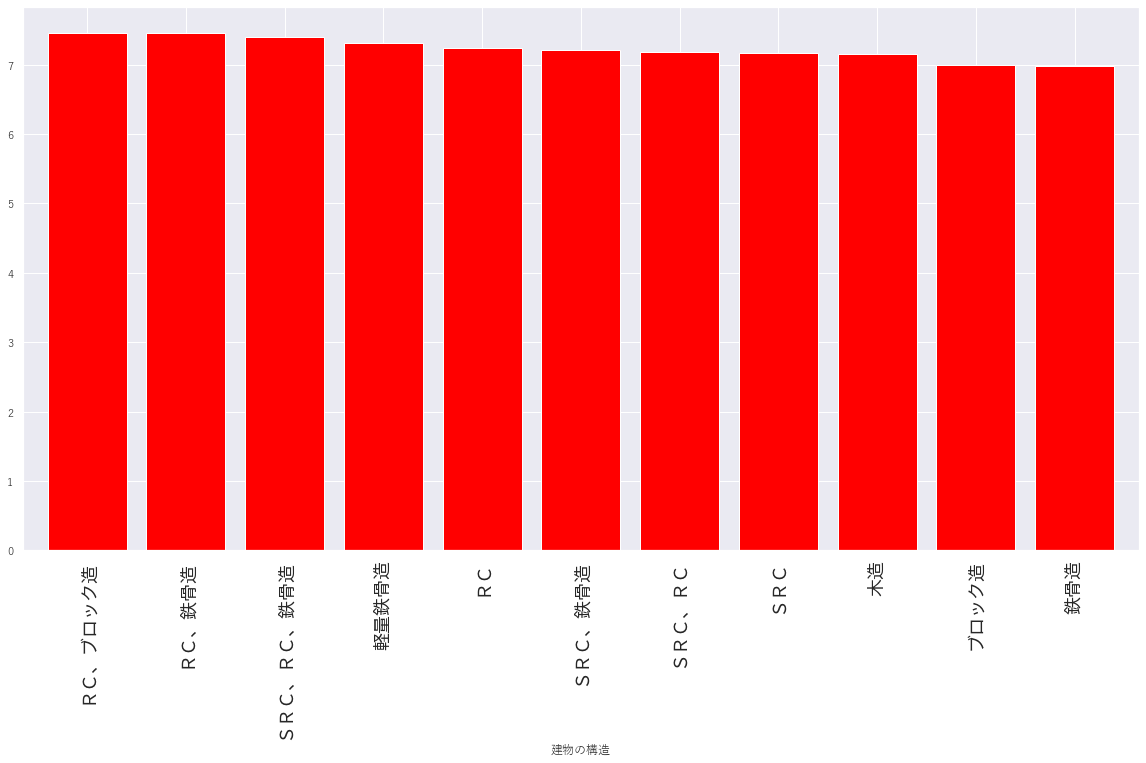

In [68]:
#建築タイプ別平均価格
PvsBT = df[['建物の構造','取引価格（総額）_log']].set_index('建物の構造').stack().reset_index().groupby('建物の構造').agg('mean')

ax = PvsBT.sort_values(by=0, ascending=False).plot(kind="bar",
                                                   legend=False,
                                                   color='red',
                                                   width=0.8, 
                                                   figsize=(20,10))

for label in ax.get_xticklabels() : 
    label.set_fontproperties(front) 
plt.show()

建物の構造については、’RC、ブロック造’(RC:reinforced concrete)、’RC’ 、’鉄骨造’の建物が最も高価な物件となっています。

## 2.価格予測
### 2.1.機能エンジニアリングとデータの前処理

データを置き換えて符号化する前に、価格予測に関連しない変数を削除する必要があります。

In [69]:
df.nunique()

市区町村コード           602
都道府県名              47
市区町村名             602
地区名             11822
最寄駅：名称           3722
最寄駅：距離（分）          34
間取り                63
面積（㎡）             104
建築年                75
建物の構造              11
用途                 21
都市計画               15
建ぺい率（％）             6
容積率（％）             17
取引時点               59
改装                  2
取引価格（総額）_log      364
dtype: int64

特異な変数が多すぎる列は削除されます:<br>
都市コード (602)<br>
都市名（602）<br>
地区名 (11822)<br>
最寄駅：名称 (3722)<br>

In [70]:
df = df.drop(['市区町村コード',
              '市区町村名',
              '地区名',
              '最寄駅：名称'], axis=1)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497111 entries, 0 to 1855
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         497111 non-null  object 
 1   最寄駅：距離（分）     497111 non-null  object 
 2   間取り           497111 non-null  object 
 3   面積（㎡）         497111 non-null  object 
 4   建築年           497111 non-null  object 
 5   建物の構造         497111 non-null  object 
 6   用途            497111 non-null  object 
 7   都市計画          497111 non-null  object 
 8   建ぺい率（％）       497111 non-null  float64
 9   容積率（％）        497111 non-null  float64
 10  取引時点          497111 non-null  object 
 11  改装            497111 non-null  object 
 12  取引価格（総額）_log  497111 non-null  float64
dtypes: float64(3), object(10)
memory usage: 53.1+ MB


"最寄り駅 "です。距離(分)」は数値変数を変換する必要があります:

In [72]:
#いくつかの値の名前を変更する必要がある
pd.unique(df['最寄駅：距離（分）'])

array(['25', '2', '30分?60分', '5', '6', '1', '13', '11', '4', '3', '8',
       '26', '20', '10', '9', '1H?1H30', '12', '18', '7', '21', '16',
       '15', '14', '22', '19', '23', '24', '2H?', '0', '28', '29', '17',
       '27', '1H30?2H'], dtype=object)

In [73]:
#すべての値を文字列に変換
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].astype(str)
#値の入れ替え
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(['30分?60分'], '30')
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(['1H?1H30'], '60')
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(['2H?'], '120')
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(['1H30?2H'], '90')                                                                                 
#フロート変数に変換
df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].astype(float)

In [74]:
#価格欄の削除
df_ml = df.drop(['取引価格（総額）_log'],axis=1)

In [75]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497111 entries, 0 to 1855
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   都道府県名      497111 non-null  object 
 1   最寄駅：距離（分）  497111 non-null  float64
 2   間取り        497111 non-null  object 
 3   面積（㎡）      497111 non-null  object 
 4   建築年        497111 non-null  object 
 5   建物の構造      497111 non-null  object 
 6   用途         497111 non-null  object 
 7   都市計画       497111 non-null  object 
 8   建ぺい率（％）    497111 non-null  float64
 9   容積率（％）     497111 non-null  float64
 10  取引時点       497111 non-null  object 
 11  改装         497111 non-null  object 
dtypes: float64(3), object(9)
memory usage: 49.3+ MB


3つのフロート変数があります:<br>
-最寄り駅。距離 (分)<br>
-建ぺい率(%)<br>
-容積率(%)<br>

まず、非数値変数をデータを置き換えて符号化し、フロート変数と統合して、最後にデータセットを学習させます。

In [76]:
df_flt = df_ml[['最寄駅：距離（分）', '建ぺい率（％）', '容積率（％）']]

df_ml = df_ml.drop(['最寄駅：距離（分）',
                    '建ぺい率（％）',
                    '容積率（％）'],axis=1)

#エンコードする文字列に変換する
df_ml = df_ml.astype('string')

In [77]:
#ホットエンコーディングを1つ定義する
encoder = OneHotEncoder(sparse=False)
#データを変換する
df2x = encoder.fit_transform(df_ml)

#データフレームに変換し直す
df2x = pd.DataFrame(df2x)

#フロート列と統合
dfd3x = pd.merge(df2x, df_flt, right_index=True, left_index=True)

#フロート変数をint型に変換する
dfd3x = dfd3x.astype('int64')

dfp = df['取引価格（総額）_log']
dfp = dfp.astype('int64')

### 2.2.トレーニングとテスト

In [16]:
#トレーニング用とテスト用のデータ分割
X=dfd3x
y=dfp
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

#モデルを初期化し、それにデータを当てはめる。
#ロジスティック回帰
model=LogisticRegression(solver='saga', max_iter=10000)
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print("Traning accuracy: ",train_score)
print("Testing accuracy: ",test_score)

Traning accuracy:  0.7633169720987306
Testing accuracy:  0.7619363728714684


線形回帰モデルを使用することで、76%の精度を得ることができました。

### 2.3.結論

76%の精度で取引価格を予測することができたが、精度を向上させるために他のモデルも試すことができます。